In [1]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from shapely.ops import cascaded_union

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [2]:
gdf = gpd.read_file("data/preschools.shp")
gdf.head()

,BESÖKSADR,BESÖKSORT,FIRMABEN,FÖRETAGSN,KOM,KOMTEXT,POSTADRE00,POSTADRESS,POSTNUMMER,geometry
0,SWEDENBORGSGATAN 31,UPPSALA,None,STIFTELSEN NÄRDAGHEM,0380,Uppsala,SWEDENBORGSGATAN 31,UPPSALA,75334,POINT (647247.000 6639892.000)
1,GÅVSTAVÄGEN 9 GÅVSTA,UPPSALA,GÅVSTA FÖRSKOLA,UPPSALA KOMMUN,0380,Uppsala,None,UPPSALA,75375,POINT (660768.000 6648985.000)
2,BLODSTENSVÄGEN 6A,UPPSALA,DIABASENS FÖRSKOLA,UPPSALA KOMMUN,0380,Uppsala,None,UPPSALA,75375,POINT (646162.000 6635995.000)
3,ALRIKSGATAN 7,UPPSALA,HÖGANÄS FÖRSKOLA,UPPSALA KOMMUN,0380,Uppsala,None,UPPSALA,75375,POINT (648077.000 6639532.000)
4,KAMOMILLGATAN 38,UPPSALA,KAMOMILLENS FÖRSKOLA,UPPSALA KOMMUN,0380,Uppsala,None,UPPSALA,75375,POINT (650270.000 6639948.000)


In [3]:
gdf.shape

(192, 10)

In [4]:
boundary = gpd.read_file("data/uppsala.shp")
boundary

,KOMMUNNAMN,KKOD,KATEGORI,LANSNAMN,KOMMUNKOD,LANSKOD,KOM_KOD,LAN_KOD,ADAT,geometry
0,Uppsala,414,Kommun,Uppsala län,380,3,0380,03,None,"POLYGON ((633536.919 6669708.750, 633292.794 6..."


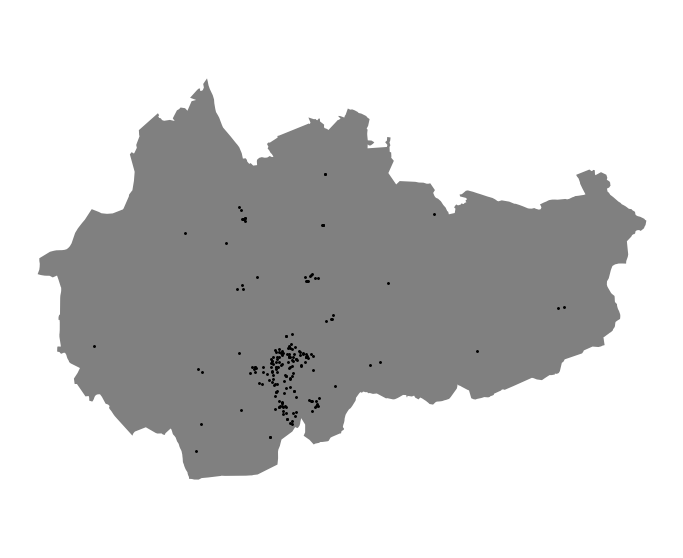

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

C:\Users\Shakur\Anaconda3\envs\geo\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


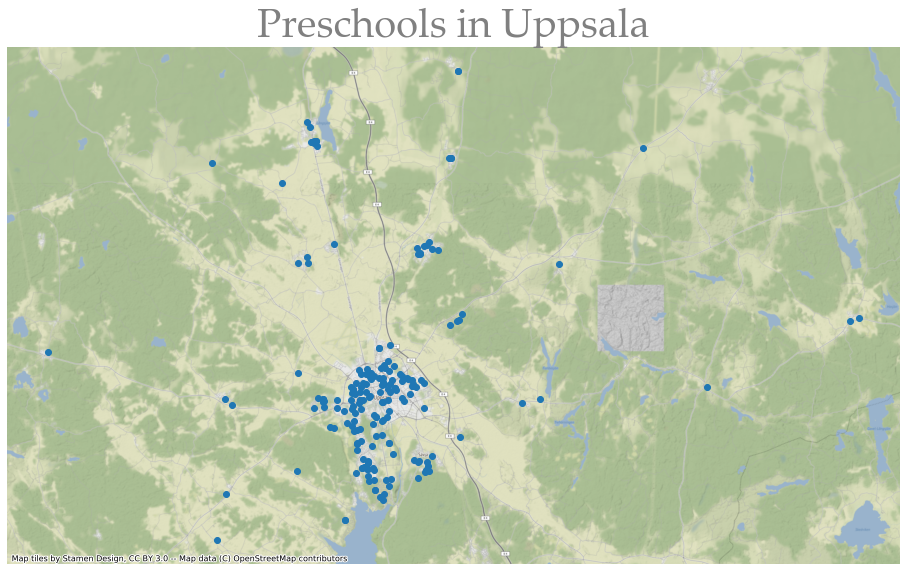

In [6]:
fig, ax = plt.subplots(figsize=(16, 18))
gdf.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)
plt.title('Preschools in Uppsala', fontsize=40, fontname="Palatino Linotype", color="grey")
ax.axis("off")
#plt.axis('equal')
plt.show()

In [7]:
boundary.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gdf.to_crs(boundary.crs)

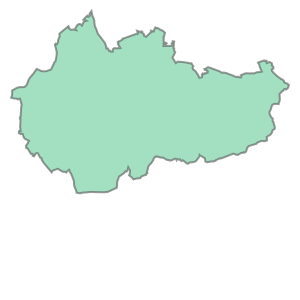

In [9]:
boundary_shape = cascaded_union(boundary.geometry)
boundary_shape

In [10]:
coords = points_to_coords(gdf_proj.geometry)

In [11]:
# Calculate Voronoi Regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)

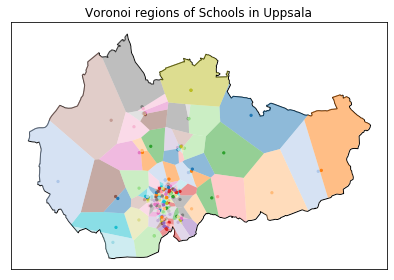

In [12]:
fig, ax = subplot_for_map()

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments)

ax.set_title('Voronoi regions of Schools in Uppsala')

plt.tight_layout()
plt.show()

In [13]:
plot_voronoi_polys_with_points_in_area?

Signature:
plot_voronoi_polys_with_points_in_area(
    ax,
    area_shape,
    poly_shapes,
    points,
    poly_to_pt_assignments=None,
    area_color='white',
    area_edgecolor='black',
    voronoi_and_points_cmap='tab20',
    voronoi_color=None,
    voronoi_edgecolor=None,
    points_color=None,
    points_markersize=5,
    points_marker='o',
    voronoi_labels=None,
    voronoi_label_fontsize=10,
    voronoi_label_color=None,
    point_labels=None,
    point_label_fontsize=7,
    point_label_color=None,
    plot_area_opts=None,
    plot_voronoi_opts=None,
    plot_points_opts=None,
)
Docstring:
All-in-one function to plot Voronoi region polygons `poly_shapes` and the respective points `points` inside a
geographic area `area_shape` on a matplotlib Axes object `ax`. By default, the regions will be blue and the points
black. Optionally pass `poly_to_pt_assignments` to show Voronoi regions and their respective points with the same
color (which is randomly drawn from color map `voronoi

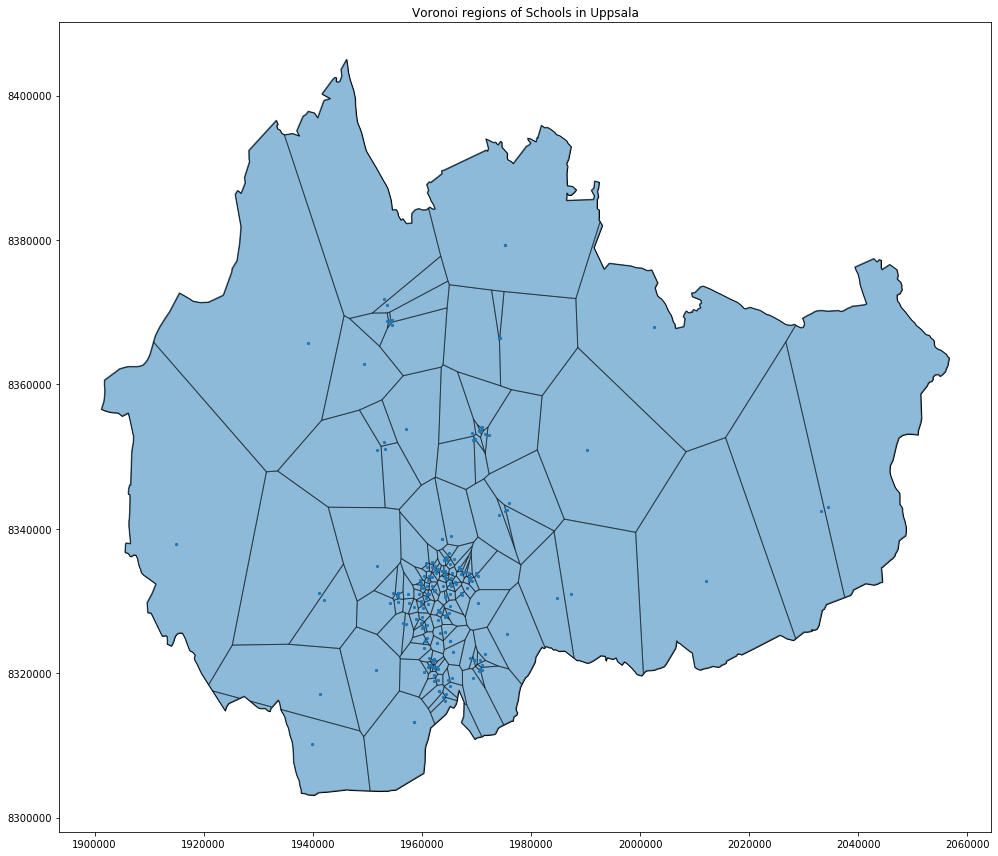

In [14]:
fig, ax = plt.subplots(figsize=(14,12))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts)

ax.set_title('Voronoi regions of Schools in Uppsala')

plt.tight_layout()
plt.show()

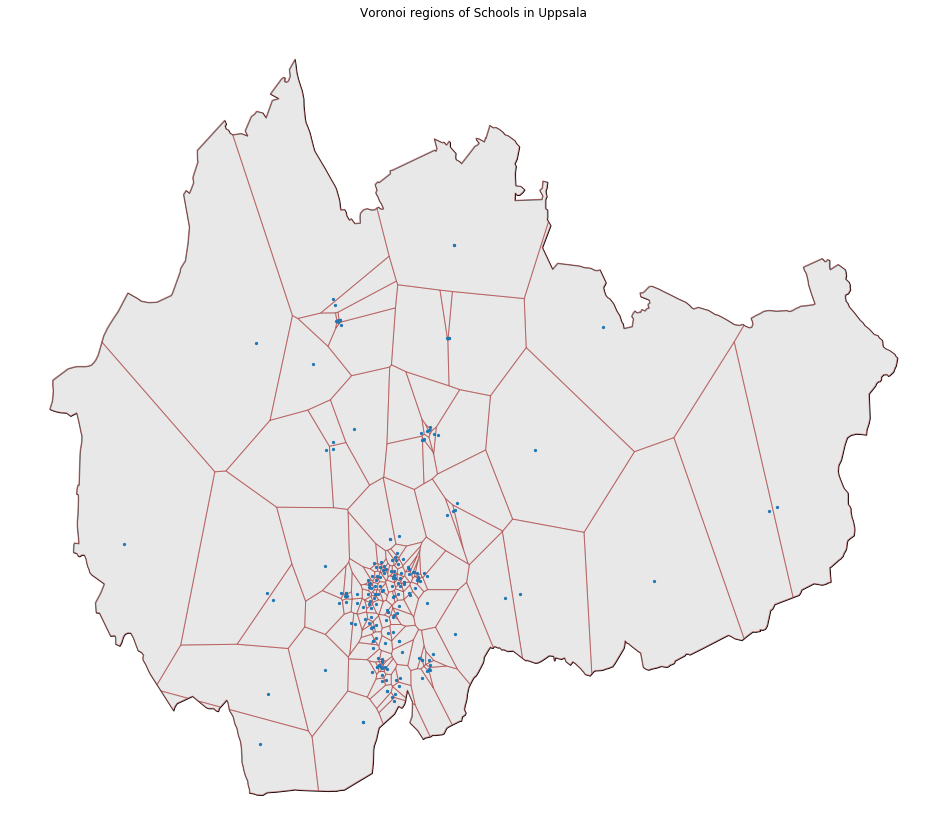

In [15]:
fig, ax = plt.subplots(figsize=(14,12))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, voronoi_color="lightgray", voronoi_edgecolor="brown")

ax.set_title('Voronoi regions of Schools in Uppsala')

plt.tight_layout()
ax.axis("off")
plt.show()

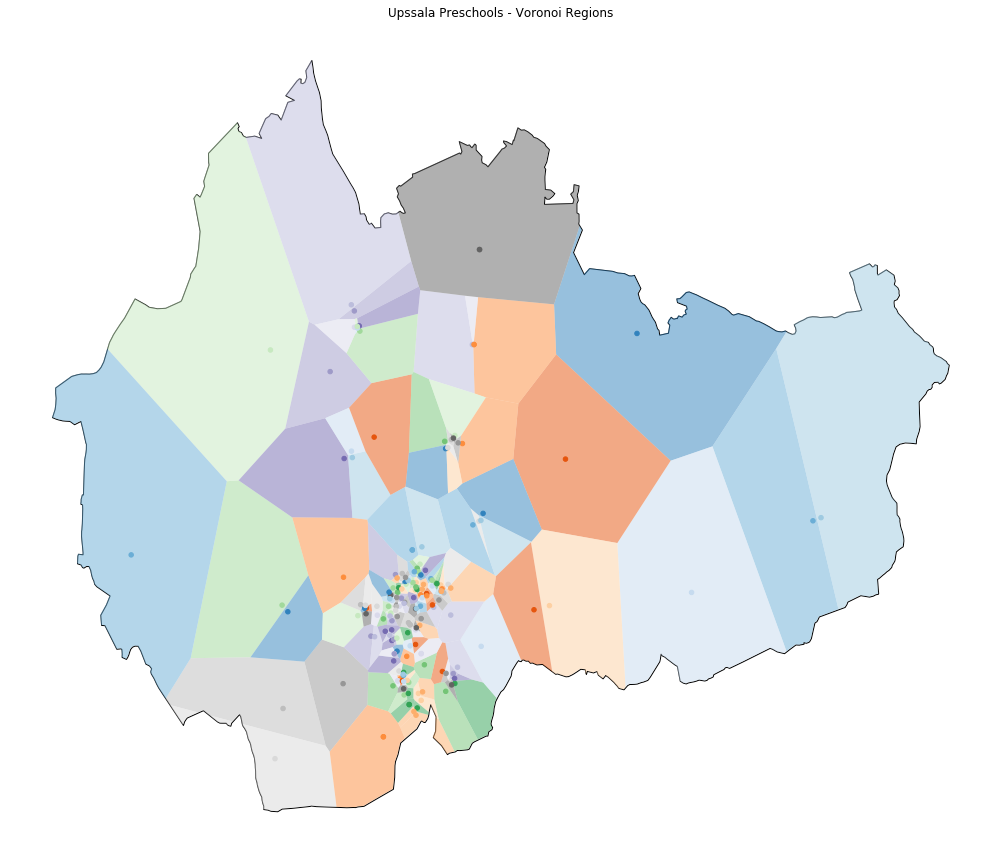

In [17]:
fig, ax = plt.subplots(figsize=(14,12))

plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments,
                                       voronoi_and_points_cmap='tab20c',
                                      points_markersize=20)

ax.set_title('Upssala Preschools - Voronoi Regions')
ax.axis("off")
plt.tight_layout()
plt.show()